In [ ]:
# Install seaborn if not already installed
!pip install seaborn

In [ ]:
# Install folium if not already installed
!pip install folium

In [ ]:
# Install termcolor if not already installed
!pip install termcolor

In [ ]:
# Import Libraries and Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import termcolor


In [ ]:
# Read in resource data
aqi_df = pd.read_csv('/content/county_annual_aqi.csv')
bea_df = pd.read_csv('/content/BEA_annual.csv', index_col=['State', 'Year'])
ihme_df = pd.read_csv('/content/IHME-GBD_2021_DATA-a408dab9-1.csv')

In [ ]:
# Display in Air Quality data by county
display(aqi_df.shape)
display(aqi_df.info())
display(aqi_df.head())

(6151, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                6151 non-null   object
 1   County                               6151 non-null   object
 2   Year                                 6151 non-null   int64 
 3   Days with AQI                        6151 non-null   int64 
 4   Good Days                            6151 non-null   int64 
 5   Moderate Days                        6151 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  6151 non-null   int64 
 7   Unhealthy Days                       6151 non-null   int64 
 8   Very Unhealthy Days                  6151 non-null   int64 
 9   Hazardous Days                       6151 non-null   int64 
 10  Max AQI                              6151 non-null   int64 
 11  90th Percentile AQI                  6151 n

None

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,205,58,1,0,0,0,129,57,39,0,0,169,95,0
1,Alabama,Clay,2015,112,73,39,0,0,0,0,92,56,43,0,0,0,112,0
2,Alabama,Colbert,2015,280,221,59,0,0,0,0,76,56,39,0,0,179,101,0
3,Alabama,DeKalb,2015,363,294,68,1,0,0,0,101,55,38,0,0,284,79,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0


In [ ]:
# AQI data filtering
aqi_df['Very Unhealthy Days'] = aqi_df['Very Unhealthy Days'] + aqi_df['Hazardous Days']
aqi_df['Unhealthy Days'] = aqi_df['Unhealthy Days'] + aqi_df['Unhealthy for Sensitive Groups Days']
aqi_columns_to_drop = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10', 'Unhealthy for Sensitive Groups Days', 'County', 'Hazardous Days']
aqi_df = aqi_df.drop(columns=aqi_columns_to_drop)
aqi_df = aqi_df[(aqi_df['Year'] >= 2015) & (aqi_df['Year'] <= 2020)]
aqi_df = aqi_df[(aqi_df['State'] == 'New York') |
                (aqi_df['State'] == 'New Mexico') |
                (aqi_df['State'] == 'Washington')]
aqi_df = aqi_df.groupby(['State', 'Year']).mean().reset_index()
aqi_df = aqi_df.set_index(['State', 'Year'])
aqi_df

Days with AQI   Good Days  Moderate Days  Unhealthy Days  \
State      Year                                                             
New Mexico 2015     283.125000  220.437500      61.500000        1.187500   
           2016     284.750000  222.500000      60.812500        1.375000   
           2017     285.250000  201.937500      78.875000        4.250000   
           2018     285.625000  192.375000      85.812500        7.437500   
           2019     283.062500  203.562500      76.125000        3.062500   
           2020     285.250000  213.562500      68.250000        3.125000   
New York   2015     352.241379  266.482759      83.068966        2.689655   
           2016     351.758621  283.620690      65.000000        3.137931   
           2017     350.965517  289.551724      59.827586        1.586207   
           2018     349.964286  280.357143      66.250000        3.321429   
           2019     334.827586  283.379310      50.689655        0.758621   
           2020     357.111111  306.296296      50.111111        0.703704   
Washington 2015     345.931034  258.758621      82.241379        4.655172   
           2016     348.758621  291.000000      56.793103        0.965517   
           2017     346.000000  254.166667      81.600000        9.333333   
           2018     355.600000  269.466667      76.266667        9.100000   
           2019     353.483871  278.354839      74.548387        0.580645   
           2020     345.322581  280.258065      56.483871        4.129032   

                 Very Unhealthy Days     Max AQI  90th Percentile AQI  \
State      Year                                                         
New Mexico 2015             0.000000   90.500000            50.312500   
           2016             0.062500  121.750000            49.937500   
           2017             0.187500  136.187500            56.812500   
           2018             0.000000  110.187500            64.062500   
           2019             0.312500  154.562500            55.437500   
           2020             0.312500  129.500000            55.000000   
New York   2015             0.000000  111.965517            57.103448   
           2016             0.000000  119.413793            54.724138   
           2017             0.000000  102.034483            52.793103   
           2018             0.035714  122.928571            55.607143   
           2019             0.000000   85.793103            51.758621   
           2020             0.000000   91.925926            51.925926   
Washington 2015             0.275862  166.068966            60.137931   
           2016             0.000000   91.068966            51.724138   
           2017             0.900000  195.333333            64.866667   
           2018             0.766667  216.266667            62.066667   
           2019             0.000000   87.838710            55.967742   
           2020             4.451613  453.354839            55.322581   

                 Median AQI  
State      Year              
New Mexico 2015   32.125000  
           2016   32.250000  
           2017   33.687500  
           2018   35.687500  
           2019   33.312500  
           2020   33.812500  
New York   2015   38.965517  
           2016   37.413793  
           2017   37.275862  
           2018   37.000000  
           2019   37.103448  
           2020   36.000000  
Washington 2015   33.793103  
           2016   29.689655  
           2017   32.933333  
           2018   31.666667  
           2019   31.032258  
           2020   29.580645

In [ ]:
# Display the BEA Economic data. This data was filtered using the combining_BEA_data.py script locafted in the Resources/BEA folder.
display(bea_df.shape)
display(bea_df.info())
display(bea_df.head())

(18, 3)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18 entries, ('New Mexico', 2015) to ('Washington', 2020)
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   personal_income  18 non-null     float64
 1   GDP (in $)       18 non-null     float64
 2   people_employed  18 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 927.0+ bytes


None

personal_income  GDP (in $)  people_employed
State      Year                                              
New Mexico 2015          79130.8     90779.4          1092272
           2016          80782.3     90476.0          1092375
           2017          82354.1     93210.1          1095489
           2018          86179.5     98838.2          1110587
           2019          91208.9    103821.0          1116429

In [ ]:
# Display the Global Health data concerning respitory illness
display(ihme_df.shape)
display(ihme_df.info())
display(ihme_df.head())

(396, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     396 non-null    int64  
 1   measure_name   396 non-null    object 
 2   location_id    396 non-null    int64  
 3   location_name  396 non-null    object 
 4   sex_id         396 non-null    int64  
 5   sex_name       396 non-null    object 
 6   age_id         396 non-null    int64  
 7   age_name       396 non-null    object 
 8   cause_id       396 non-null    int64  
 9   cause_name     396 non-null    object 
 10  metric_id      396 non-null    int64  
 11  metric_name    396 non-null    object 
 12  year           396 non-null    int64  
 13  val            396 non-null    float64
 14  upper          0 non-null      float64
 15  lower          0 non-null      float64
dtypes: float64(3), int64(7), object(6)
memory usage: 49.6+ KB


None

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,27,Probability of death,554,New Mexico,1,Male,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2010,0.090795,NaN,NaN
1,27,Probability of death,554,New Mexico,2,Female,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2010,0.087510,NaN,NaN
2,27,Probability of death,554,New Mexico,3,Both,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2010,0.088478,NaN,NaN
3,27,Probability of death,554,New Mexico,1,Male,22,All ages,510,Pneumoconiosis,8,Probability of death,2010,0.001187,NaN,NaN
4,27,Probability of death,554,New Mexico,2,Female,22,All ages,510,Pneumoconiosis,8,Probability of death,2010,0.000036,NaN,NaN


In [ ]:
# Health data filtering
ihme_columns_to_drop = ['measure_id', 'location_id', 'sex_id', 'age_id', 'cause_id', 'metric_id', 'metric_name', 'upper', 'lower', 'age_name']
ihme_df = ihme_df.drop(columns=ihme_columns_to_drop)
ihme_df = ihme_df.rename(columns={
    'location_name': 'State',
    'measure_name': 'Measure',
    'sex_name': 'Sex',
    'cause_name': 'Cause',
    'val': 'Chronic Respiratory Related POD (%)',
    'year': 'Year'})
ihme_df['Chronic Respiratory Related POD (%)'] = ihme_df['Chronic Respiratory Related POD (%)'] * 100
ihme_df = ihme_df[(ihme_df['Year'] >= 2015) & (ihme_df['Year'] <= 2020)]
ihme_df = ihme_df[(ihme_df['Sex'] == 'Both')]
ihme_df = ihme_df[(ihme_df['State'] == 'New York') |
                (ihme_df['State'] == 'New Mexico') |
                (ihme_df['State'] == 'Washington')]
ihme_df = ihme_df.groupby(['State', 'Year'])['Chronic Respiratory Related POD (%)'].mean().reset_index()
ihme_df = ihme_df.set_index(['State', 'Year'])
ihme_df

Chronic Respiratory Related POD (%)
State      Year                                     
New Mexico 2015                             3.013077
           2016                             2.952616
           2017                             2.937757
           2018                             2.916583
           2019                             2.801632
           2020                             2.361161
New York   2015                             2.121560
           2016                             2.091189
           2017                             2.131849
           2018                             2.135137
           2019                             2.136529
           2020                             1.715384
Washington 2015                             2.791529
           2016                             2.751772
           2017                             2.728443
           2018                             2.639162
           2019                             2.607898
           2020                             2.429295

In [ ]:
# Merging tables into a master DataFrame
master_df = bea_df.merge(aqi_df, left_index=True, right_index=True)
master_df = master_df.merge(ihme_df, left_index=True, right_index=True)
# Creating Master Data Set
master_df.to_csv('/content/master.csv')
# Load the master dataset
master_df = pd.read_csv('/content/master.csv', index_col=['State', 'Year'])
master_df

personal_income  GDP (in $)  people_employed  Days with AQI  \
State      Year                                                                
New Mexico 2015          79130.8     90779.4          1092272     283.125000   
           2016          80782.3     90476.0          1092375     284.750000   
           2017          82354.1     93210.1          1095489     285.250000   
           2018          86179.5     98838.2          1110587     285.625000   
           2019          91208.9    103821.0          1116429     283.062500   
           2020          98480.2    100656.4          1068784     285.250000   
New York   2015        1137082.3   1498474.7         12099197     352.241379   
           2016        1176654.7   1556830.0         12259166     351.758621   
           2017        1255776.7   1624800.7         12391361     350.965517   
           2018        1298669.0   1710665.6         12655123     349.964286   
           2019        1343851.2   1787470.9         12745397     334.827586   
           2020        1415297.4   1773369.8         11871078     357.111111   
Washington 2015         376360.8    467590.6          4199164     345.931034   
           2016         397270.6    489790.2          4313722     348.758621   
           2017         423017.2    527169.4          4432271     346.000000   
           2018         451609.2    570337.8          4537842     355.600000   
           2019         484540.9    608643.4          4591912     353.483871   
           2020         522509.2    620132.9          4434976     345.322581   

                  Good Days  Moderate Days  Unhealthy Days  \
State      Year                                              
New Mexico 2015  220.437500      61.500000        1.187500   
           2016  222.500000      60.812500        1.375000   
           2017  201.937500      78.875000        4.250000   
           2018  192.375000      85.812500        7.437500   
           2019  203.562500      76.125000        3.062500   
           2020  213.562500      68.250000        3.125000   
New York   2015  266.482759      83.068966        2.689655   
           2016  283.620690      65.000000        3.137931   
           2017  289.551724      59.827586        1.586207   
           2018  280.357143      66.250000        3.321429   
           2019  283.379310      50.689655        0.758621   
           2020  306.296296      50.111111        0.703704   
Washington 2015  258.758621      82.241379        4.655172   
           2016  291.000000      56.793103        0.965517   
           2017  254.166667      81.600000        9.333333   
           2018  269.466667      76.266667        9.100000   
           2019  278.354839      74.548387        0.580645   
           2020  280.258065      56.483871        4.129032   

                 Very Unhealthy Days     Max AQI  90th Percentile AQI  \
State      Year                                                         
New Mexico 2015             0.000000   90.500000            50.312500   
           2016             0.062500  121.750000            49.937500   
           2017             0.187500  136.187500            56.812500   
           2018             0.000000  110.187500            64.062500   
           2019             0.312500  154.562500            55.437500   
           2020             0.312500  129.500000            55.000000   
New York   2015             0.000000  111.965517            57.103448   
           2016             0.000000  119.413793            54.724138   
           2017             0.000000  102.034483            52.793103   
           2018             0.035714  122.928571            55.607143   
           2019             0.000000   85.793103            51.758621   
           2020             0.000000   91.925926            51.925926   
Washington 2015             0.275862  166.068966            60.137931   
           2016             0.000000   91.068966            51.724138   
       

# Analysis #1:

    # Comparative State Analysis: Recent economic performance vs.
    # air quality across the three states
    
    # This establishes a baseline understanding of how the latest
    # economic indicators relate to air quality metrics in our chosen
    # states. providing a snapshot of whether states with stronger
    # economies maintain better or worse air quality.

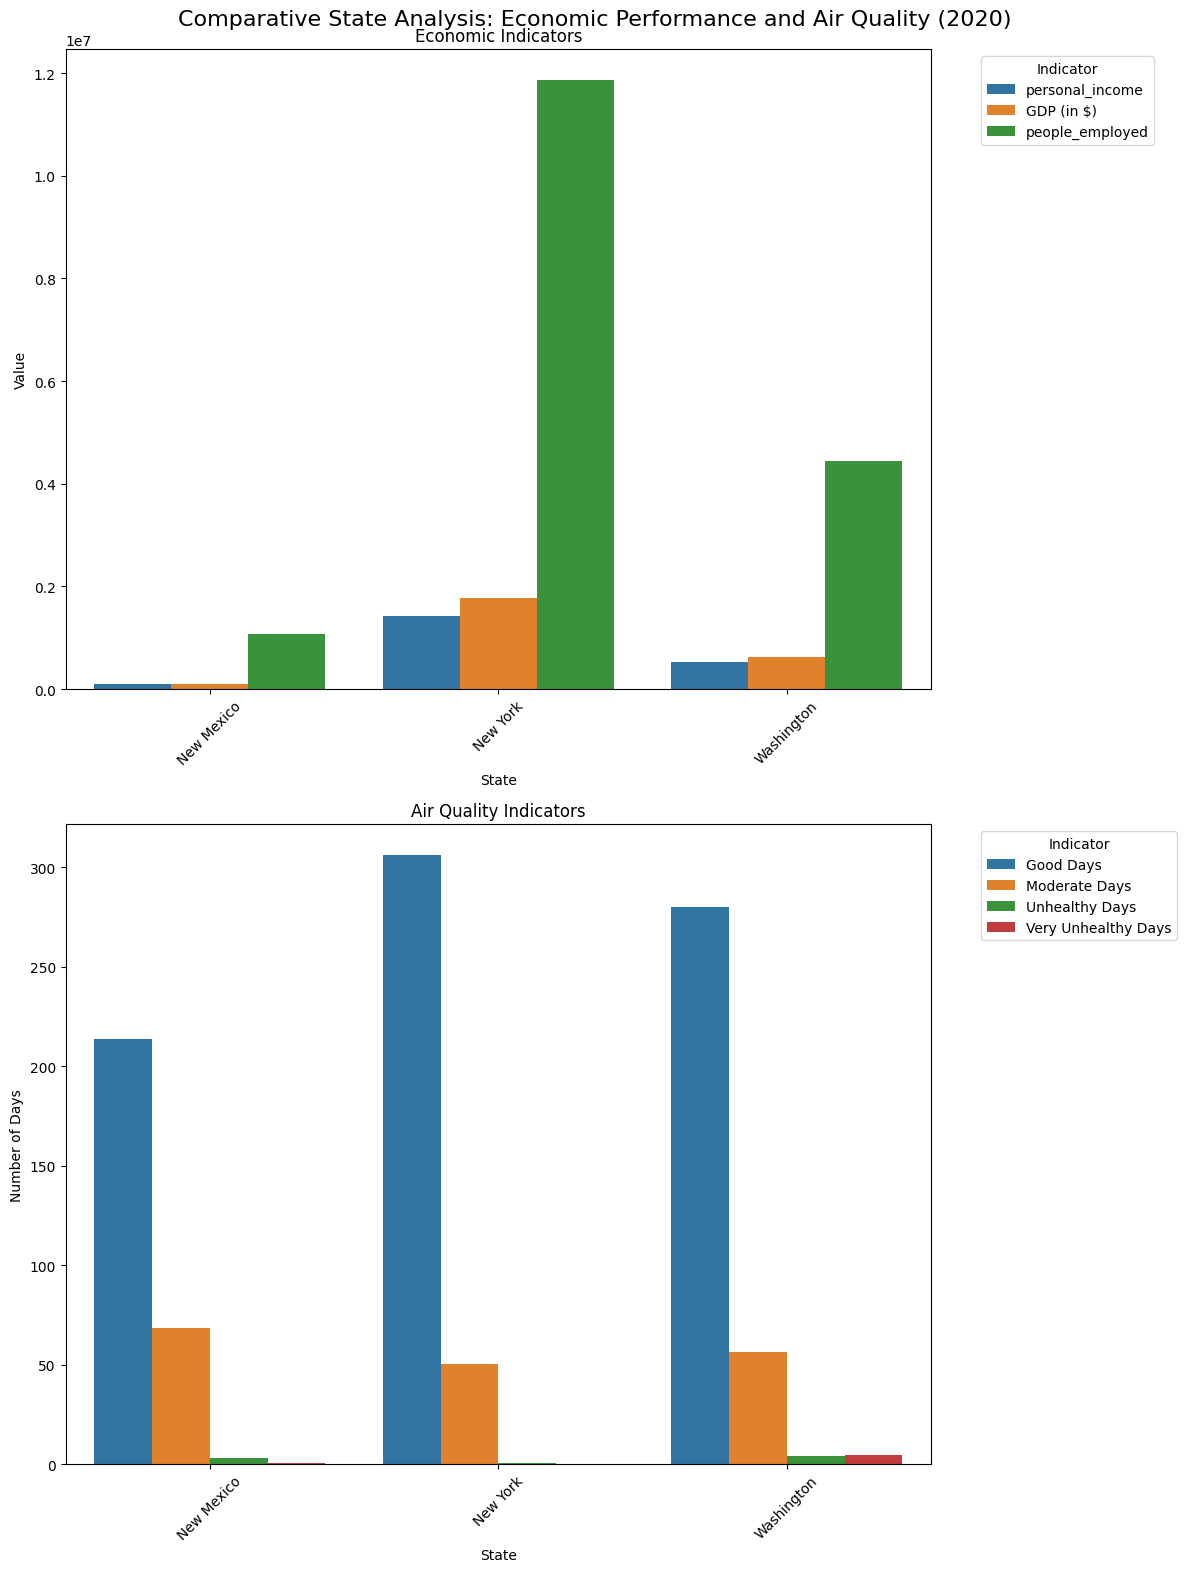

In [ ]:
# Filter the data for 2020
df_2020 = master_df.loc[pd.IndexSlice[:, 2020], :].copy()
# Reset index to make State a column
df_2020 = df_2020.reset_index()
# Prepare economic indicators
economic_data = df_2020[['State', 'personal_income', 'GDP (in $)', 'people_employed']]
economic_data_melted = economic_data.melt(id_vars=['State'], var_name='Indicator', value_name='Value')
# Prepare air quality indicators
air_quality_data = df_2020[['State', 'Good Days', 'Moderate Days', 'Unhealthy Days', 'Very Unhealthy Days']]
# air_quality_data = df_2020[['State', 'Unhealthy Days', 'Very Unhealthy Days']]
air_quality_data_melted = air_quality_data.melt(id_vars=['State'], var_name='Indicator', value_name='Value')
# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
fig.suptitle('Comparative State Analysis: Economic Performance and Air Quality (2020)', fontsize=16)
# Plot economic indicators
sns.barplot(x='State', y='Value', hue='Indicator', data=economic_data_melted, ax=ax1)
ax1.set_title('Economic Indicators')
ax1.set_ylabel('Value')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
# Plot air quality indicators
sns.barplot(x='State', y='Value', hue='Indicator', data=air_quality_data_melted, ax=ax2)
ax2.set_title('Air Quality Indicators')
ax2.set_ylabel('Number of Days')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Conclusion:
    # These findings imply that effective environmental policies,
    # geographical factors, and the nature of economic activities
    # play crucial roles in determining air quality alongside economic
    # performance. Further research into specific industries, population
    # density, and environmental regulations would provide more
    # comprehensive insights into these relationships.

    # The analysis challenges the common assumption that higher economic
    # activity leads to poorer air quality, as demonstrated by New York's
    # superior performance in both economic metrics and good air quality
    # days (306 days) compared to the smaller economies of
    # Washington (280 days) and New Mexico (213 days).Conclusion:

# Analysis #2:
    # Time Series Analysis: GDP vs. AQI for New York State & Washington
    # This analysis examines the relationship between economic growth
    # (measured by GDP) and air quality (measured by Max AQI) in New York
    # State and Washington from 2015 to 2020.

    # It aims to reveal potential correlations or divergences between
    # economic performance and environmental quality over time in both
    # states given that Washington had the most 'Very Unhealthy Days'.

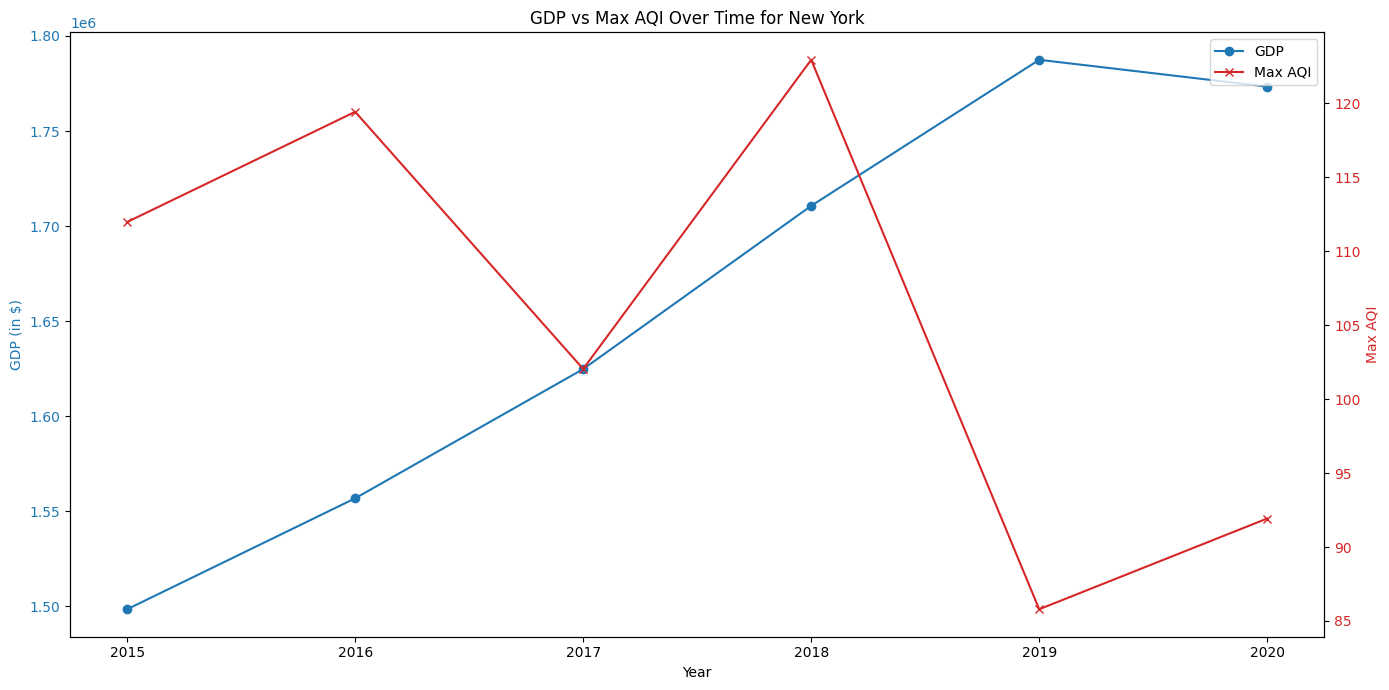

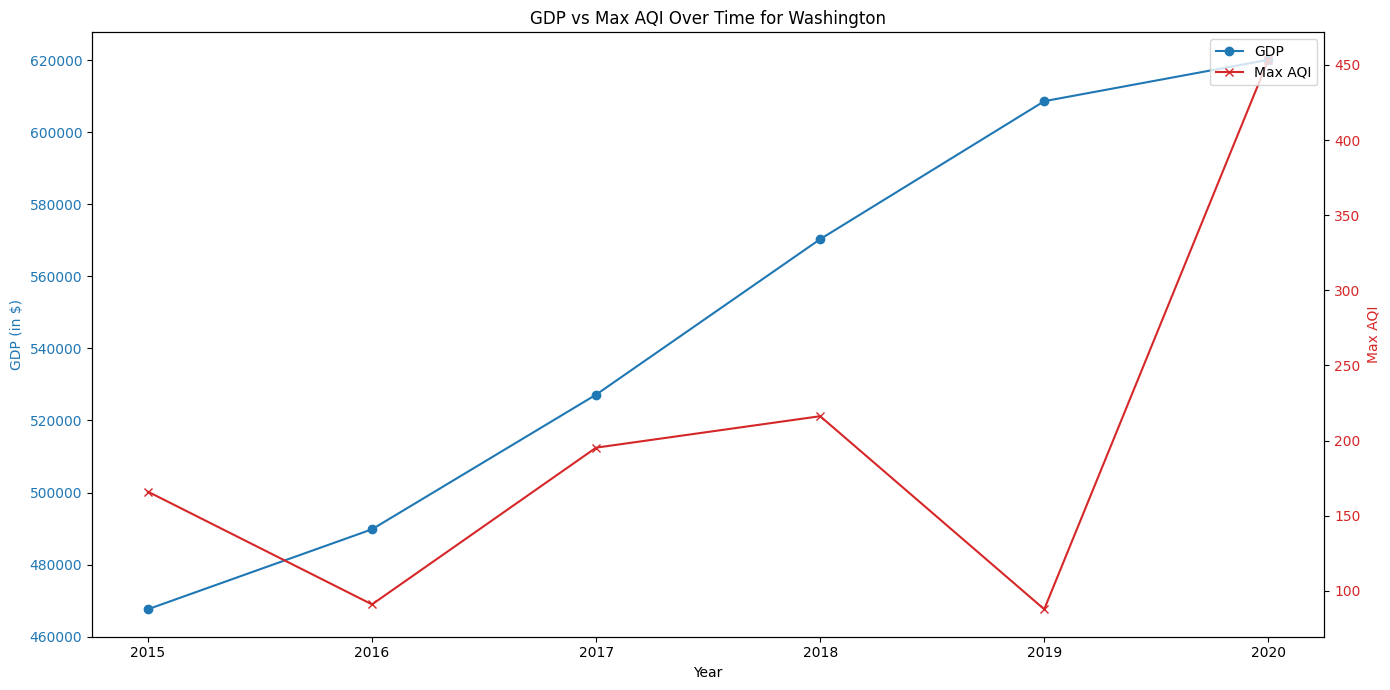

In [ ]:
# Function to create plot for a given state
master_df = master_df.reset_index()
def create_gdp_aqi_plot(state_data, state_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Plot GDP on the first y-axis
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP (in $)', color='tab:blue')
    ax1.plot(state_data['Year'], state_data['GDP (in $)'], color='tab:blue', marker='o', label='GDP')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    # Create a second y-axis for Max AQI
    ax2 = ax1.twinx()
    ax2.set_ylabel('Max AQI', color='tab:red')
    ax2.plot(state_data['Year'], state_data['Max AQI'], color='tab:red', marker='x', label='Max AQI')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title(f'GDP vs Max AQI Over Time for {state_name}')
    fig.tight_layout()
    plt.show()
# Create plot for New York
ny_data = master_df[master_df['State'] == 'New York']
create_gdp_aqi_plot(ny_data, 'New York')
# Create plot for Washington
wa_data = master_df[master_df['State'] == 'Washington']
create_gdp_aqi_plot(wa_data, 'Washington')

# Conclusion:
    # From 2015 to 2020, New York's GDP grew from approximately $1.5 trillion to $1.77 trillion,
    # reflecting consistent economic expansion despite a slight dip in 2020 due to the pandemic,
    # while Washington's GDP increased steadily from $467 billion in 2015 to $620 billion in 2020,
    # showcasing robust economic growth.
    
    # Unlike New York, Washington's GDP and Max AQI trends diverged more noticeably, indicating
    # that economic growth may have coincided with periods of poorer air quality. The differing
    # trends between New York and Washington highlight the importance of tailored environmental
    # policies and management strategies to balance economic growth with air quality maintenance.

    # These findings underscore the critical need for integrated public health strategies that
    # address the environmental impacts of economic activities, ensuring that economic prosperity
    # does not come at the cost of public health.

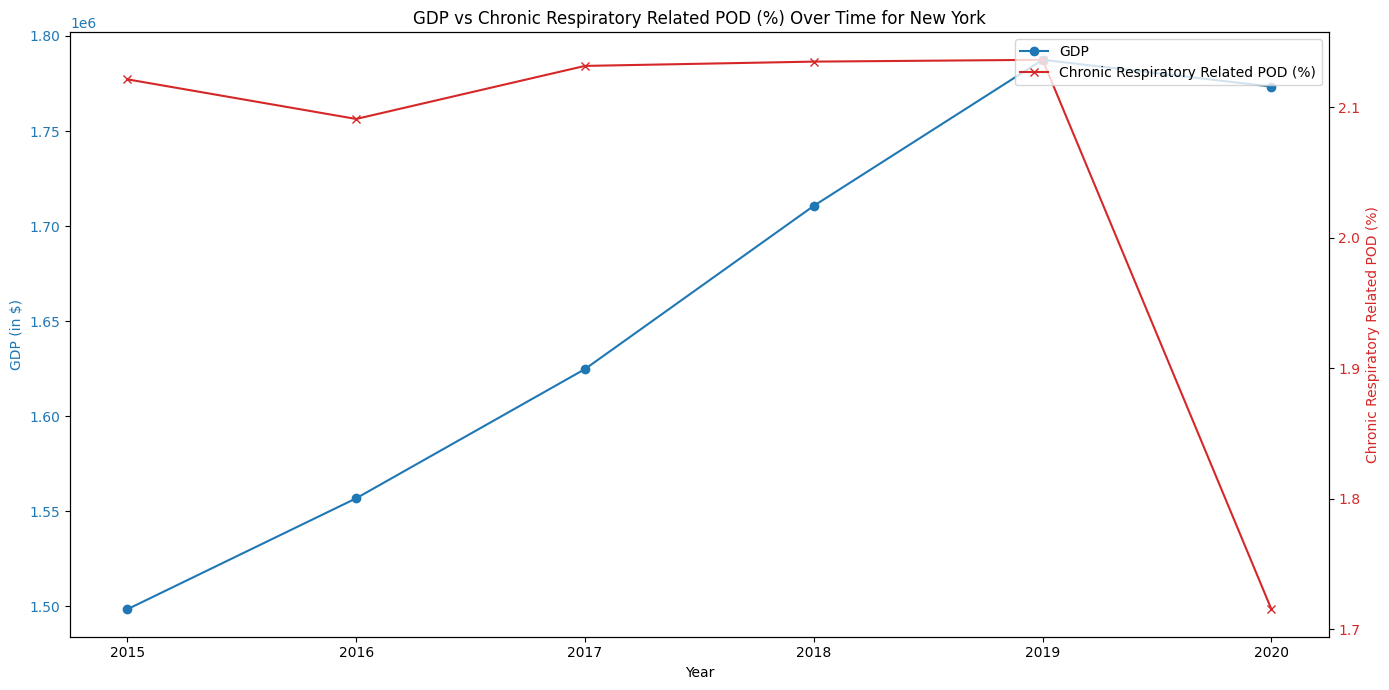

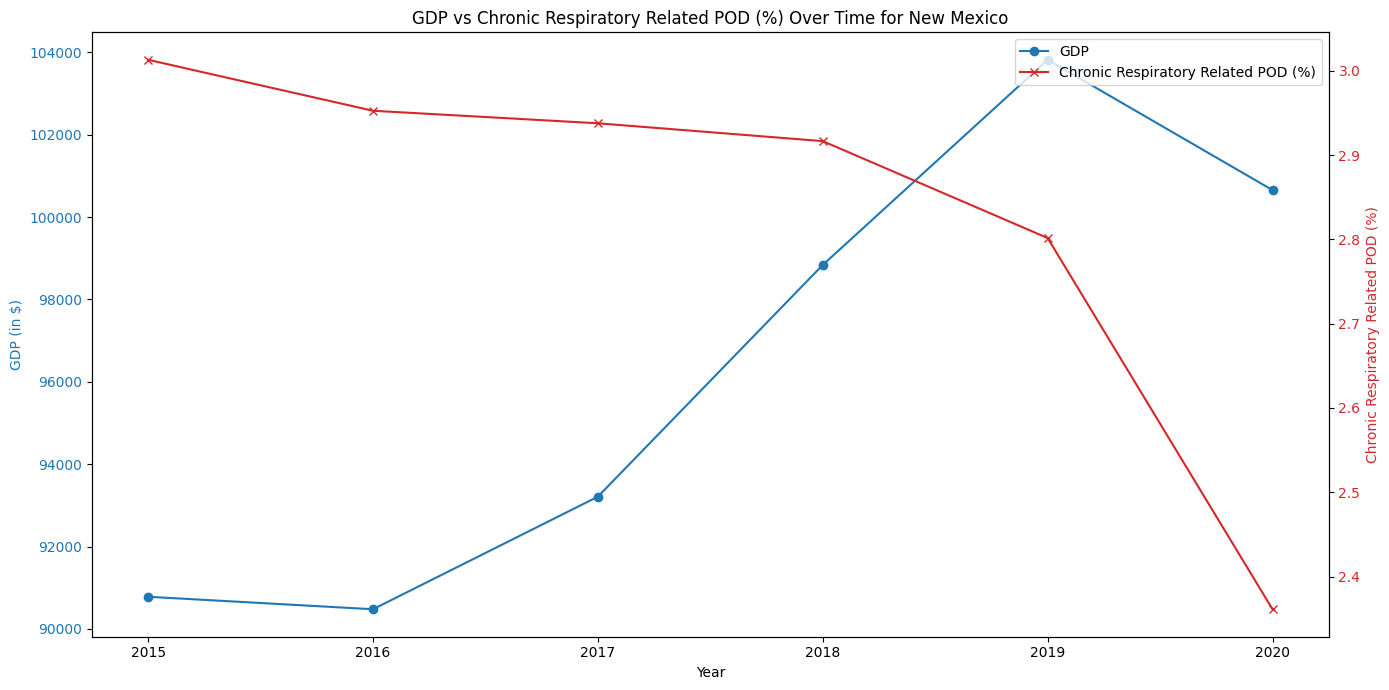

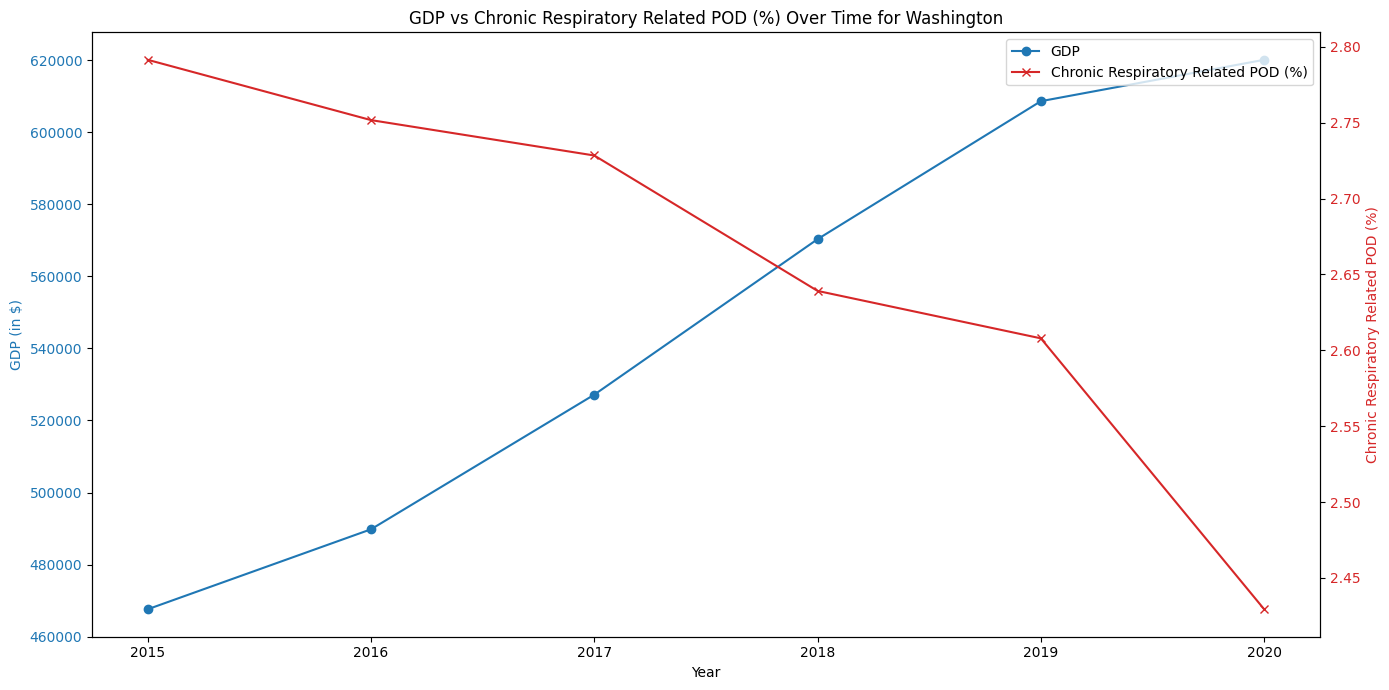

In [78]:
def create_gdp_health_plot(state_data, state_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Plot GDP on the first y-axis
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP (in $)', color='tab:blue')
    ax1.plot(state_data['Year'], state_data['GDP (in $)'], color='tab:blue', marker='o', label='GDP')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    # Create a second y-axis for Chronic Respiratory Related POD (%)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Chronic Respiratory Related POD (%)', color='tab:red')
    ax2.plot(state_data['Year'], state_data['Chronic Respiratory Related POD (%)'], color='tab:red',
             marker='x', label='Chronic Respiratory Related POD (%)')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title(f'GDP vs Chronic Respiratory Related POD (%) Over Time for {state_name}')
    fig.tight_layout()
    plt.show()
# Create plot for New York
ny_data = master_df[master_df['State'] == 'New York']
create_gdp_health_plot(ny_data, 'New York')
# Create plot for New Mexico
nm_data = master_df[master_df['State'] == 'New Mexico']
create_gdp_health_plot(nm_data, 'New Mexico')
# Create plot for Washington
wa_data = master_df[master_df['State'] == 'Washington']
create_gdp_health_plot(wa_data, 'Washington')

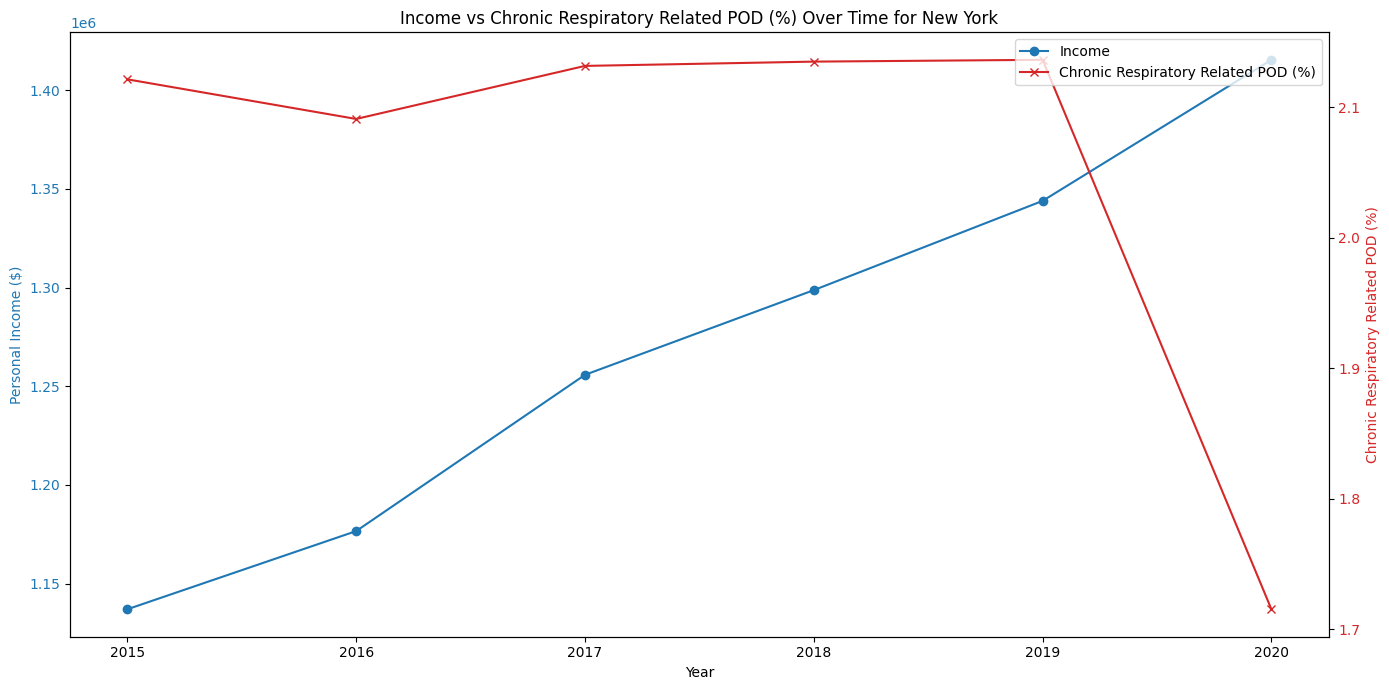

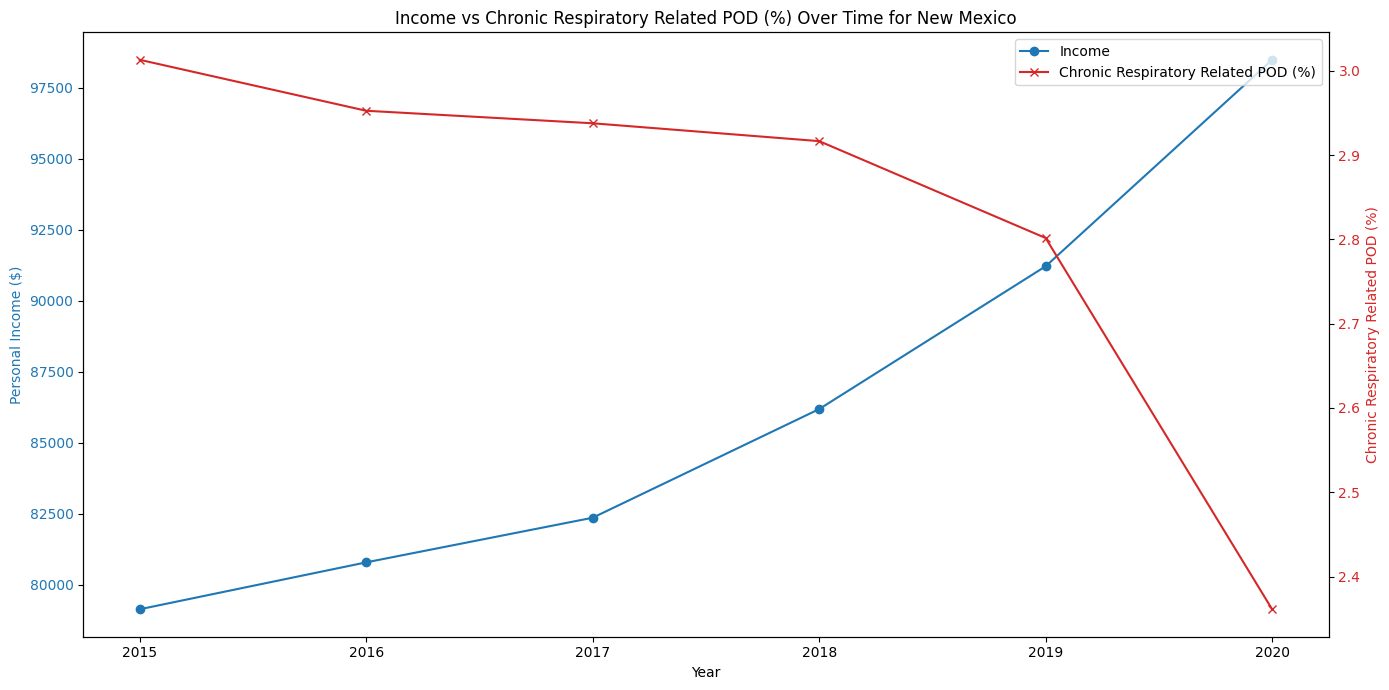

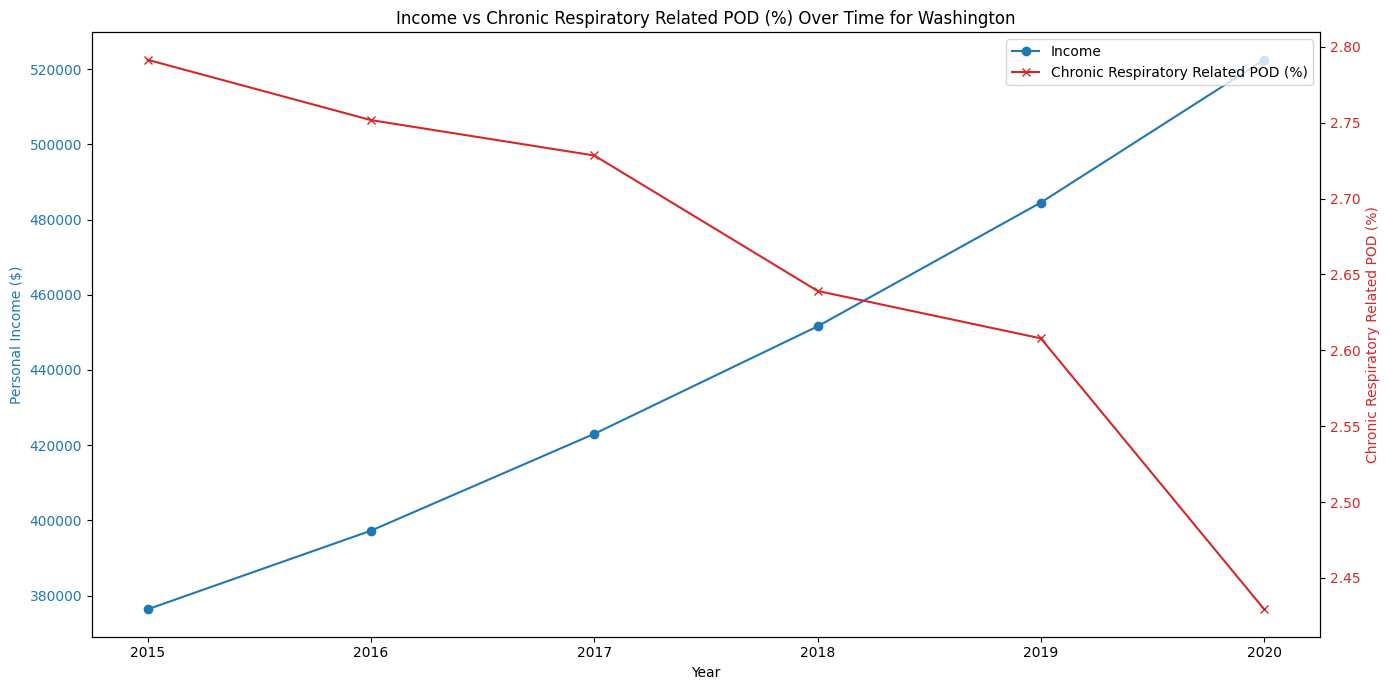

In [80]:
def create_income_health_plot(state_data, state_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Plot Income on the first y-axis
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Personal Income ($)', color='tab:blue')
    ax1.plot(state_data['Year'], state_data['personal_income'], color='tab:blue', marker='o', label='Income')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    # Create a second y-axis for Chronic Respiratory Related POD (%)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Chronic Respiratory Related POD (%)', color='tab:red')
    ax2.plot(state_data['Year'], state_data['Chronic Respiratory Related POD (%)'], color='tab:red',
             marker='x', label='Chronic Respiratory Related POD (%)')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title(f'Income vs Chronic Respiratory Related POD (%) Over Time for {state_name}')
    fig.tight_layout()
    plt.show()
# Create plot for New York
ny_data = master_df[master_df['State'] == 'New York']
create_income_health_plot(ny_data, 'New York')
# Create plot for New Mexico
nm_data = master_df[master_df['State'] == 'New Mexico']
create_income_health_plot(nm_data, 'New Mexico')
# Create plot for Washington
wa_data = master_df[master_df['State'] == 'Washington']
create_income_health_plot(wa_data, 'Washington')




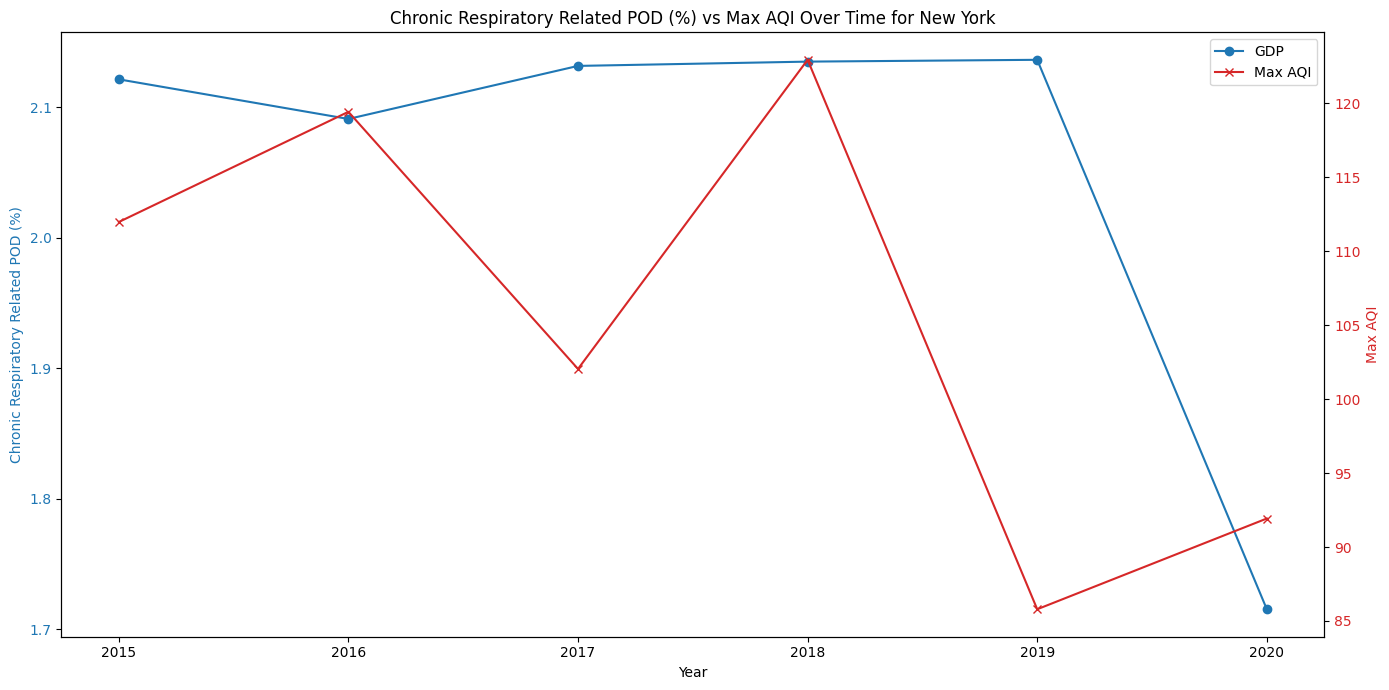

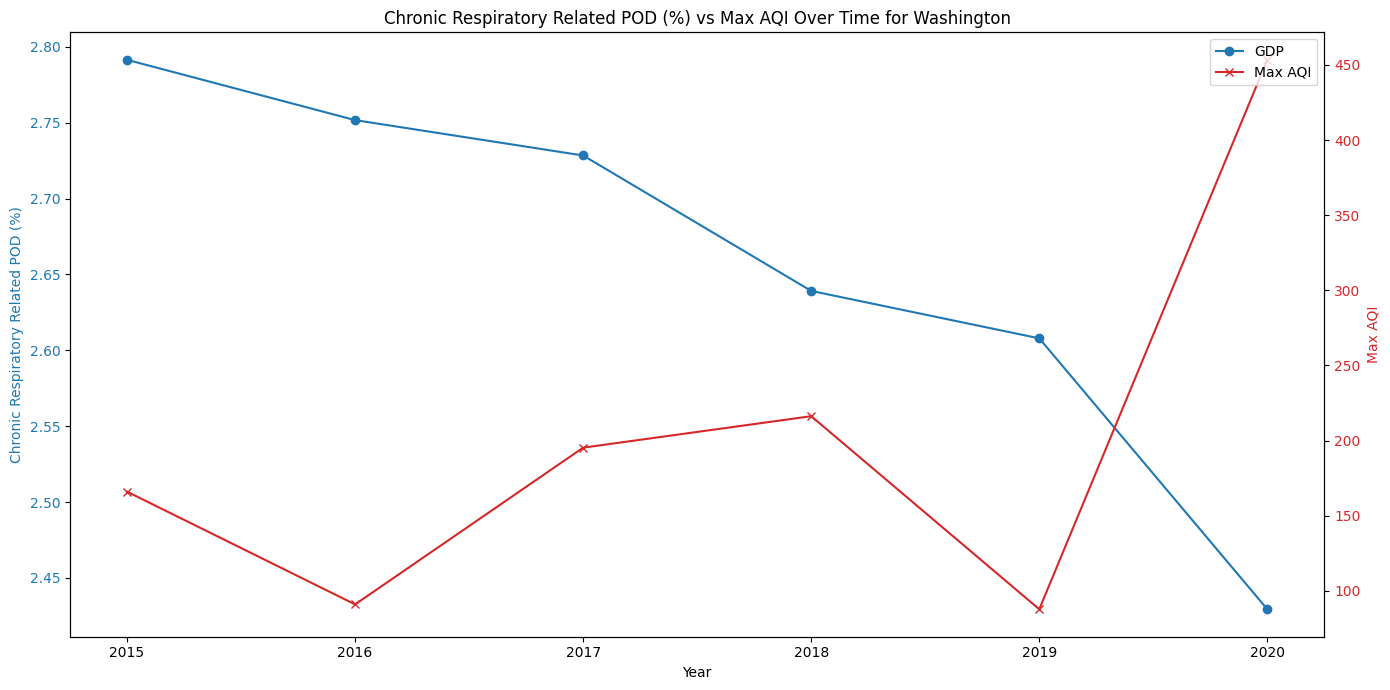

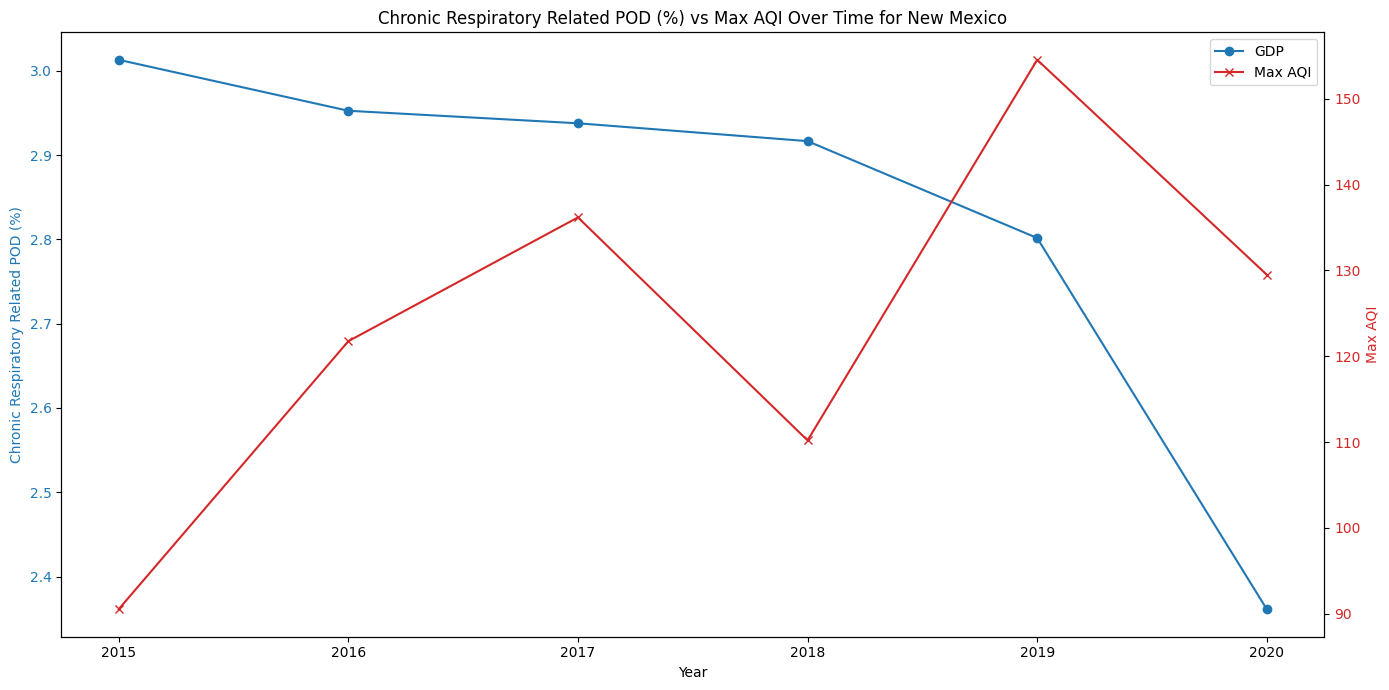

In [82]:
def create_health_aqi_plot(state_data, state_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Plot GDP on the first y-axis
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Chronic Respiratory Related POD (%)', color='tab:blue')
    ax1.plot(state_data['Year'], state_data['Chronic Respiratory Related POD (%)'], color='tab:blue', marker='o', label='GDP')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    # Create a second y-axis for Max AQI
    ax2 = ax1.twinx()
    ax2.set_ylabel('Max AQI', color='tab:red')
    ax2.plot(state_data['Year'], state_data['Max AQI'], color='tab:red', marker='x', label='Max AQI')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title(f'Chronic Respiratory Related POD (%) vs Max AQI Over Time for {state_name}')
    fig.tight_layout()
    plt.show()
# Create plot for New York
ny_data = master_df[master_df['State'] == 'New York']
create_health_aqi_plot(ny_data, 'New York')
# Create plot for Washington
wa_data = master_df[master_df['State'] == 'Washington']
create_health_aqi_plot(wa_data, 'Washington')
# Create plot for New Mexico
nm_data = master_df[master_df['State'] == 'New Mexico']
create_health_aqi_plot(nm_data, 'New Mexico')